<a href="https://colab.research.google.com/github/subhash505/datat_analytics/blob/main/jm_factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install factor_analyzer==0.2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv("/content/bfi.csv")

In [7]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [8]:
df.shape

(2800, 29)

In [9]:
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(2436, 26)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2436 non-null   int64  
 1   A1          2436 non-null   float64
 2   A2          2436 non-null   float64
 3   A3          2436 non-null   float64
 4   A4          2436 non-null   float64
 5   A5          2436 non-null   float64
 6   C1          2436 non-null   float64
 7   C2          2436 non-null   float64
 8   C3          2436 non-null   float64
 9   C4          2436 non-null   float64
 10  C5          2436 non-null   float64
 11  E1          2436 non-null   float64
 12  E2          2436 non-null   float64
 13  E3          2436 non-null   float64
 14  E4          2436 non-null   float64
 15  E5          2436 non-null   float64
 16  N1          2436 non-null   float64
 17  N2          2436 non-null   float64
 18  N3          2436 non-null   float64
 19  N4          2436 non-null  

In [13]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [14]:
df=df.iloc[0:,1:26]

PERFORM ADEQUACY TEST

In [15]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18146.065577235022, 0.0)

test was statistically significant (by comparing alpha  HYPOTHESIS ) :observed correlation matrix is not an identity matrix

In [16]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [17]:
kmo_all

,KMO
A1,0.754072
A2,0.836432
A3,0.870202
A4,0.878042
A5,0.903559
C1,0.843363
C2,0.795816
C3,0.851972
C4,0.826590
C5,0.864113


In [18]:
kmo_model

0.8486452309468395

In [20]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 25, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,5.134311
1,2.751887
2,2.142702
3,1.852328
4,1.548163
5,1.073582
6,0.839539
7,0.799206
8,0.718989
9,0.688089


In [21]:
df.shape[1]

25

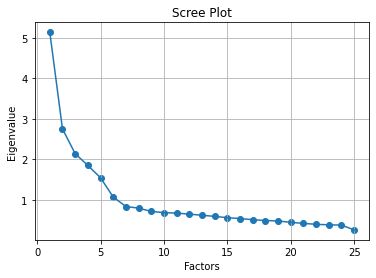

In [22]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


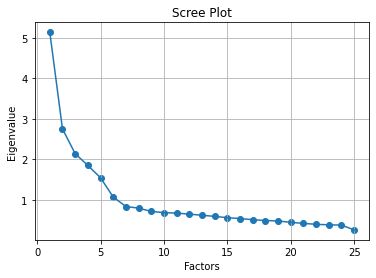

In [23]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [24]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 6, rotation="varimax")

In [25]:
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,0.040783,0.095220,0.048734,-0.113057,-0.530987,0.161216
A2,0.235538,0.033131,0.133714,0.063734,0.661141,-0.006244
A3,0.343008,-0.009621,0.121353,0.033990,0.605933,0.160106
A4,0.219717,-0.081518,0.235140,-0.125338,0.404594,0.086356
A5,0.414458,-0.149616,0.106382,0.030977,0.469698,0.236519
C1,0.077248,-0.004358,0.554582,0.190124,0.007511,0.095035
C2,0.038370,0.068330,0.674545,0.087593,0.057055,0.152775
C3,0.031867,-0.039994,0.551164,-0.011338,0.101282,0.008996
C4,-0.066241,0.216283,-0.638475,-0.143846,-0.102617,0.318359
C5,-0.180812,0.284187,-0.544838,0.025837,-0.059955,0.132423


In [26]:
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.analyze(df, 5, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.040465,0.111126,0.022798,-0.077931,-0.428166
A2,0.213716,0.029588,0.139037,0.062139,0.626946
A3,0.317848,0.009357,0.109331,0.056196,0.650743
A4,0.204566,-0.066476,0.230584,-0.112700,0.435624
A5,0.393034,-0.122113,0.087869,0.066708,0.537087
C1,0.070184,0.010416,0.545824,0.209584,0.038878
C2,0.033270,0.089574,0.648731,0.115434,0.102782
C3,0.023907,-0.030855,0.557036,-0.005183,0.111578
C4,-0.064984,0.240410,-0.633806,-0.107535,-0.037498
C5,-0.176395,0.290318,-0.562467,0.036822,-0.047525


In [27]:
# Get variance of each factors
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.473090,2.709633,2.041106,1.522153,1.844498
Proportion Var,0.098924,0.108385,0.081644,0.060886,0.073780
Cumulative Var,0.098924,0.207309,0.288953,0.349839,0.423619
